In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
pd.set_option('display.max_columns',None)

In [7]:
train = pd.read_csv('Training_manual_cleaned.csv')
target = '43'
IDcol = 'application_key'
train.head()

,application_key,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,230032,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.000000,18414.0,1780.0,6423.0,3067.0,123875.0,216152.0,1.0,1.0,1.0,3.0,3.0,94.78,8987.180,3700.00,72.25,1462.0,4532.0,2890.0,61.0,4532.0,1095.0,625.0,1.1667,8.0,10.0,4.0,1.0,0.08696,10.0,0.63899,0.0,1.0,156.327,0.0,0.0
1,230033,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.000000,13664.0,1780.0,765.0,1931.0,42613.0,216152.0,0.0,0.0,0.0,0.0,0.0,74.25,953.060,953.06,4.80,1028.0,2099.0,2099.0,30386.0,2281.0,2829.0,169.0,0.4167,8.0,0.0,2.0,0.0,0.00000,13.0,0.63836,1.0,0.0,99.129,0.0,1.0
2,230034,1745.0,0.4001,0.000,0.0,0.0,297.0,2536.0,2478.0,34097.436013,2536.0,1780.0,2977.5,4090.0,76109.0,216152.0,0.0,0.0,0.0,0.0,0.0,59.69,3974.425,3700.00,40.44,1472.0,2738.0,2555.0,669.0,4623.0,3772.0,300.0,25.0833,1.0,3.0,1.0,0.0,0.00000,1.0,1.00000,0.0,0.0,29.290,0.0,1.0
3,230035,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.000000,37013.0,1780.0,0.0,0.0,84235.0,216152.0,0.0,0.0,0.0,0.0,0.0,59.69,0.000,3700.00,0.00,1308.0,2525.0,791.0,91.0,5992.0,2829.0,215.0,10.3333,3.0,3.0,2.0,0.0,0.15385,3.0,0.53241,1.0,0.0,96.272,0.0,0.0
4,230036,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.000000,4696.0,1780.0,2257.0,27815.0,123875.0,524848.0,0.0,0.0,0.0,0.0,0.0,20.51,796.670,3700.00,28.72,801.0,2281.0,2281.0,487.0,2707.0,2829.0,158.0,0.9167,2.0,3.0,2.0,0.0,0.00000,1.0,0.92665,1.0,0.0,115.019,0.0,0.0


In [5]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4



def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

C:\Users\BaadRoR\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\BaadRoR\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [8]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
# gbm0 = GradientBoostingClassifier(random_state=10)
# modelfit(gbm0, train, predictors)

In [ ]:
[len(0,1,39,40,36,6,37,5,41,23,9,24,4,18,12,42,14,25,31])

# Best  n_estimators 80 

In [10]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
param_test1 = {"n_estimators":[80,90,100,110,120,130,140,150,160,170]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [80, 90, 100, 110, 120, 130, 140, 150, 160, 170]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [11]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.83647, std: 0.00632, params: {'n_estimators': 80},
  mean: 0.83610, std: 0.00634, params: {'n_estimators': 90},
  mean: 0.83554, std: 0.00621, params: {'n_estimators': 100},
  mean: 0.83517, std: 0.00640, params: {'n_estimators': 110},
  mean: 0.83474, std: 0.00636, params: {'n_estimators': 120},
  mean: 0.83441, std: 0.00655, params: {'n_estimators': 130},
  mean: 0.83379, std: 0.00667, params: {'n_estimators': 140},
  mean: 0.83320, std: 0.00688, params: {'n_estimators': 150},
  mean: 0.83292, std: 0.00659, params: {'n_estimators': 160},
  mean: 0.83265, std: 0.00664, params: {'n_estimators': 170}],
 {'n_estimators': 80},
 0.836467092357205)

# max_depth 7

In [13]:
param_test2 = {'max_depth':[5,7,9,11,13,15,17,19], 'min_samples_split':[200,400,600,800,1000,1200,1400,1600]}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.15, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.83766, std: 0.00624, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.83789, std: 0.00620, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.83844, std: 0.00641, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.83831, std: 0.00599, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.83819, std: 0.00630, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.83817, std: 0.00658, params: {'max_depth': 5, 'min_samples_split': 1200},
  mean: 0.83786, std: 0.00612, params: {'max_depth': 5, 'min_samples_split': 1400},
  mean: 0.83762, std: 0.00597, params: {'max_depth': 5, 'min_samples_split': 1600},
  mean: 0.83772, std: 0.00612, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.83868, std: 0.00656, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.83828, std: 0.00665, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.83879, std: 0.00648, params: {'max_depth': 7, 'min_samples_split': 800},


# min_samples_leaf': 30, 'min_samples_split': 2000 

In [16]:
param_test3 = {'min_samples_split':[1000,1200,1400,1600,1800,2000,2200,2400], 'min_samples_leaf':[30,40,50,60,70,80]}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.83947, std: 0.00664, params: {'min_samples_leaf': 30, 'min_samples_split': 1000},
  mean: 0.83967, std: 0.00625, params: {'min_samples_leaf': 30, 'min_samples_split': 1200},
  mean: 0.83933, std: 0.00604, params: {'min_samples_leaf': 30, 'min_samples_split': 1400},
  mean: 0.83977, std: 0.00638, params: {'min_samples_leaf': 30, 'min_samples_split': 1600},
  mean: 0.83985, std: 0.00627, params: {'min_samples_leaf': 30, 'min_samples_split': 1800},
  mean: 0.84003, std: 0.00638, params: {'min_samples_leaf': 30, 'min_samples_split': 2000},
  mean: 0.83965, std: 0.00645, params: {'min_samples_leaf': 30, 'min_samples_split': 2200},
  mean: 0.83960, std: 0.00587, params: {'min_samples_leaf': 30, 'min_samples_split': 2400},
  mean: 0.83926, std: 0.00616, params: {'min_samples_leaf': 40, 'min_samples_split': 1000},
  mean: 0.83989, std: 0.00610, params: {'min_samples_leaf': 40, 'min_samples_split': 1200},
  mean: 0.83951, std: 0.00623, params: {'min_samples_leaf': 40, 'min_samples_spl

In [17]:
gsearch3.score(train[predictors],train[target])

0.8576602299509131

# max_feature 15

In [19]:
param_test4 = {'max_features':[7,9,11,13,15,17,19,21,23,25]}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=80,max_depth=7, min_samples_split=2000, min_samples_leaf=30, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.83821, std: 0.00614, params: {'max_features': 7},
  mean: 0.83789, std: 0.00609, params: {'max_features': 9},
  mean: 0.83771, std: 0.00626, params: {'max_features': 11},
  mean: 0.83756, std: 0.00636, params: {'max_features': 13},
  mean: 0.83849, std: 0.00635, params: {'max_features': 15},
  mean: 0.83811, std: 0.00605, params: {'max_features': 17},
  mean: 0.83837, std: 0.00645, params: {'max_features': 19},
  mean: 0.83793, std: 0.00591, params: {'max_features': 21},
  mean: 0.83798, std: 0.00567, params: {'max_features': 23},
  mean: 0.83783, std: 0.00657, params: {'max_features': 25}],
 {'max_features': 15},
 0.838487595152239)

In [20]:
gsearch4.score(train[predictors],train[target])

0.8670275420228308

In [ ]:
# modelfit(gsearch4, train, predictors)

# subsample=.8

In [9]:
param_test5 = {'subsample':[0.5,0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.15, n_estimators=80,max_depth=5,min_samples_split=1200, min_samples_leaf=70, subsample=0.8, random_state=10,max_features=13),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.83869, std: 0.00584, params: {'subsample': 0.5},
  mean: 0.83878, std: 0.00564, params: {'subsample': 0.6},
  mean: 0.83956, std: 0.00604, params: {'subsample': 0.7},
  mean: 0.83954, std: 0.00560, params: {'subsample': 0.75},
  mean: 0.83965, std: 0.00627, params: {'subsample': 0.8},
  mean: 0.83925, std: 0.00575, params: {'subsample': 0.85},
  mean: 0.83925, std: 0.00599, params: {'subsample': 0.9}],
 {'subsample': 0.8},
 0.8396505447068365)

# n=200 leaning rate .1

In [13]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200,max_depth=7, min_samples_split=2000,min_samples_leaf=30, subsample=0.8, random_state=10, max_features=15)
# modelfit(gbm_tuned_1, train, predictors)
gbm_tuned_1.fit(train[predictors],train[target])
gbm_tuned_1.score(train[predictors],train[target])

0.8409249783295585

# n=1500 learning rate =.01

In [15]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=7, min_samples_split=2000,min_samples_leaf=30, subsample=0.8, random_state=10, max_features=15)
# modelfit(gbm_tuned_1, train, predictors)
gbm_tuned_2.fit(train[predictors],train[target])
gbm_tuned_2.score(train[predictors],train[target])

0.8375136314067612

# n=2000 , learning rate .005

In [17]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=7, min_samples_split=2000,min_samples_leaf=30, subsample=0.8, random_state=10, max_features=15)
# modelfit(gbm_tuned_1, train, predictors)
gbm_tuned_3.fit(train[predictors],train[target])
gbm_tuned_3.score(train[predictors],train[target])

0.8375136314067612

In [ ]:
n=1500

In [ ]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_4 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=7, min_samples_split=2000,min_samples_leaf=30, subsample=0.8, random_state=10, max_features=15)
# modelfit(gbm_tuned_1, train, predictors)
gbm_tuned_4.fit(train[predictors],train[target])
gbm_tuned_4.score(train[predictors],train[target])

In [18]:
lead_df=pd.read_csv('lead_board_manual_cleaned.csv',index_col='application_key')
# lead_df.columns=colm[:-1]
# lead_df=(lead_df-lead_df.mean(axis=0))/lead_df.std(axis=0)
# lead_df=lead_df[imp_col[:-1]]
# lead_df=Pca(lead_df)
print(len(predictors),lead_df.shape, 'gbm ')


lead_pred=gbm_tuned_3.predict(lead_df)
proba=gbm_tuned_3.predict_proba(lead_df)
lead_df['pridicted']=lead_pred
lead_df['prob']=proba[:,0]
lead_df=lead_df.sort_values(by=['prob'],ascending=False)
result=lead_df['pridicted'].astype(int)
result.to_csv('Datadevils_IITGuwahati_202.csv')

43 (25000, 43) gbm 


In [ ]:
gsearch5 = GradientBoostingClassifier(n_estimators=80,learning_rate=0.1,max_depth=7,min_samples_split=2000, min_samples_leaf=30, subsample=0.75, random_state=10,max_features=15)
gsearch5.fit(train[predictors],train[target])
gsearch5.score(train[predictors],train[target])#grid_scores_, gsearch5.best_params_, gsearch5.best_score_


Model Report
Accuracy : 0.8409
AUC Score (Train): 0.872478
CV Score : Mean - 0.8401147 | Std - 0.006200041 | Min - 0.8292882 | Max - 0.8464002


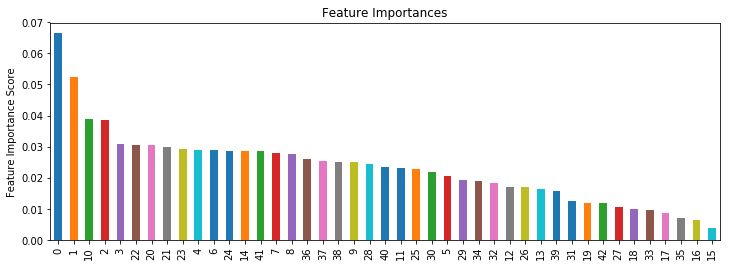

In [19]:
modelfit(gbm_tuned_1, train, predictors)

# best_columns=[0,1,10,2,3,22,20,21,23,4,6,24,14,41,7]

# Evalution Manual Clean 

In [23]:
lead_df=pd.read_csv('lead_board_manual_cleaned.csv',index_col='application_key')
# lead_df.columns=colm[:-1]
# lead_df=(lead_df-lead_df.mean(axis=0))/lead_df.std(axis=0)
# lead_df=lead_df[imp_col[:-1]]
# lead_df=Pca(lead_df)
print(len(predictors),lead_df.shape, 'gbm ')


lead_pred=gbm_tuned_2.predict(lead_df)
proba=gbm_tuned_2.predict_proba(lead_df)
lead_df['pridicted']=lead_pred
lead_df['prob']=proba[:,0]
lead_df=lead_df.sort_values(by=['prob'],ascending=False)
result=lead_df['pridicted'].astype(int)
result.to_csv('lead_1_training_mannual_label.csv')
lead_df.to_csv('lead_data_manual_clean_with_label.csv')

43 (25000, 43) gbm 


In [21]:
lead_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,pridicted,prob
application_key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
577014,1939.0,0.0000,0.0,0.0,0.0,3881.0,99100.0,21901.0,338223.0,199653.0,1876.5,3149.0,83153.0,198200.0,551669.0,0.0,0.0,0.0,0.0,0.0,12.916,206.22,3300.0,3.85,1236.0,7756.0,3042.0,30386.0,8030.0,3620.0,1138.0,14.8333,4.0,22.0,8.0,0.0,0.0,15.0,0.89863,1.0,0.0,0.000,0.0,0.0,0.992949
588481,1931.0,0.0560,0.0,0.0,0.0,4955.0,18829.0,18829.0,269454.0,105060.0,1876.5,3551.0,33776.0,198200.0,434443.0,0.0,0.0,0.0,0.0,0.0,15.924,0.00,0.0,3.60,2361.0,6996.0,6996.0,30386.0,10980.0,3437.0,2483.0,23.3333,3.0,22.0,7.0,0.0,0.0,23.0,0.88439,1.0,0.0,81.294,0.0,0.0,0.992891
571176,1937.0,0.0071,0.0,0.0,0.0,3270.0,139662.0,24650.0,159420.0,236751.0,1876.5,2846.0,24717.0,77298.0,438226.0,0.0,0.0,0.0,0.0,0.0,7.738,547.95,1000.0,3.11,2105.0,7178.0,7178.0,30386.0,10950.0,3620.0,2006.0,17.0833,9.0,21.0,4.0,0.0,0.0,19.0,0.88458,1.0,0.0,0.000,0.0,0.0,0.992678
584493,1881.0,0.0000,0.0,0.0,0.0,1015.0,24641.0,24641.0,229441.0,125990.0,1876.5,15596.0,172487.0,0.0,252016.0,0.0,0.0,0.0,0.0,0.0,14.572,2264.32,3300.0,11.26,2982.0,9733.0,9733.0,30386.0,9733.0,4471.0,1863.0,25.3333,6.0,13.0,4.0,0.0,0.0,21.0,0.79656,1.0,0.0,0.000,0.0,0.0,0.992582
585548,1915.0,0.0000,0.0,0.0,0.0,2478.0,29730.0,29730.0,125362.0,57901.0,1876.5,2077.0,34107.0,49550.0,301867.0,0.0,0.0,0.0,0.0,0.0,9.981,0.00,3300.0,6.26,996.0,2738.0,2738.0,30386.0,5658.0,2859.0,819.0,1.4167,3.0,21.0,2.0,0.0,0.0,7.0,0.98987,1.0,0.0,0.000,0.0,0.0,0.992578
